In [135]:
# 1. Import nescessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [136]:
#2. reading the data as a dataframe using the pandas library
data=pd.read_csv('insurance.csv')
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [154]:
                                                    #PERFORM EDA

In [138]:
# a. shape of the data
data.shape
#the shape of the data has been generated. 
#it is seen that the data contains 1338 rows and 7 columns

(1338, 7)

In [139]:
# b. Data type of each attribute

pd.DataFrame(data.dtypes)

#the individual attributes and their respective datatype has been shown below:

0
age         int64
sex        object
bmi       float64
children    int64
smoker     object
region     object
charges   float64

In [140]:
data.info()
#we know that the total number of rows is 1338 
#and clearly the data below shows that all the rows of all the attributes have non-null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [141]:
# c. Checking the presence of missing values
data.isnull().sum()
#there are no null values in the given dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [142]:
# d. 5 point summary of numerical attributes
data.describe()

#the 5 point summary
#the min,Q1(25%),Q2(50% or median),Q3(75%),max values are as below

#children category seem to have an outlier as there is a drastic increase from 75th quartile and max value

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

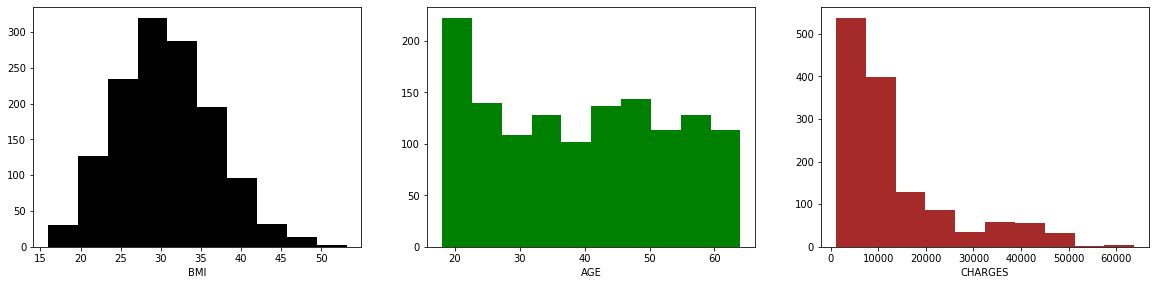

In [143]:
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
plt.hist(data['bmi'],color='black')
plt.xlabel('BMI')

plt.subplot(3,3,2)
plt.hist(data['age'],color='green')
plt.xlabel('AGE')

plt.subplot(3,3,3)
plt.hist(data['charges'],color='brown')
plt.xlabel('CHARGES')
plt.show()

#the distribution of AGE and CHARGES are also shown below
#the distribution of BMI is like a normal distribution
#the distribution of age is almost uniformly distributed
#the distribution of charges looks like it is right skewed

In [144]:
# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

m={'skewness'}
n=pd.DataFrame(data.skew()).T
n.drop(['children'],axis=1)

#the skewness values of age,bmi and charges are as follows

#bmi and age have less skewness, whereas charges are heavily skewed

age       bmi  charges
0  0.055673  0.284047  1.51588

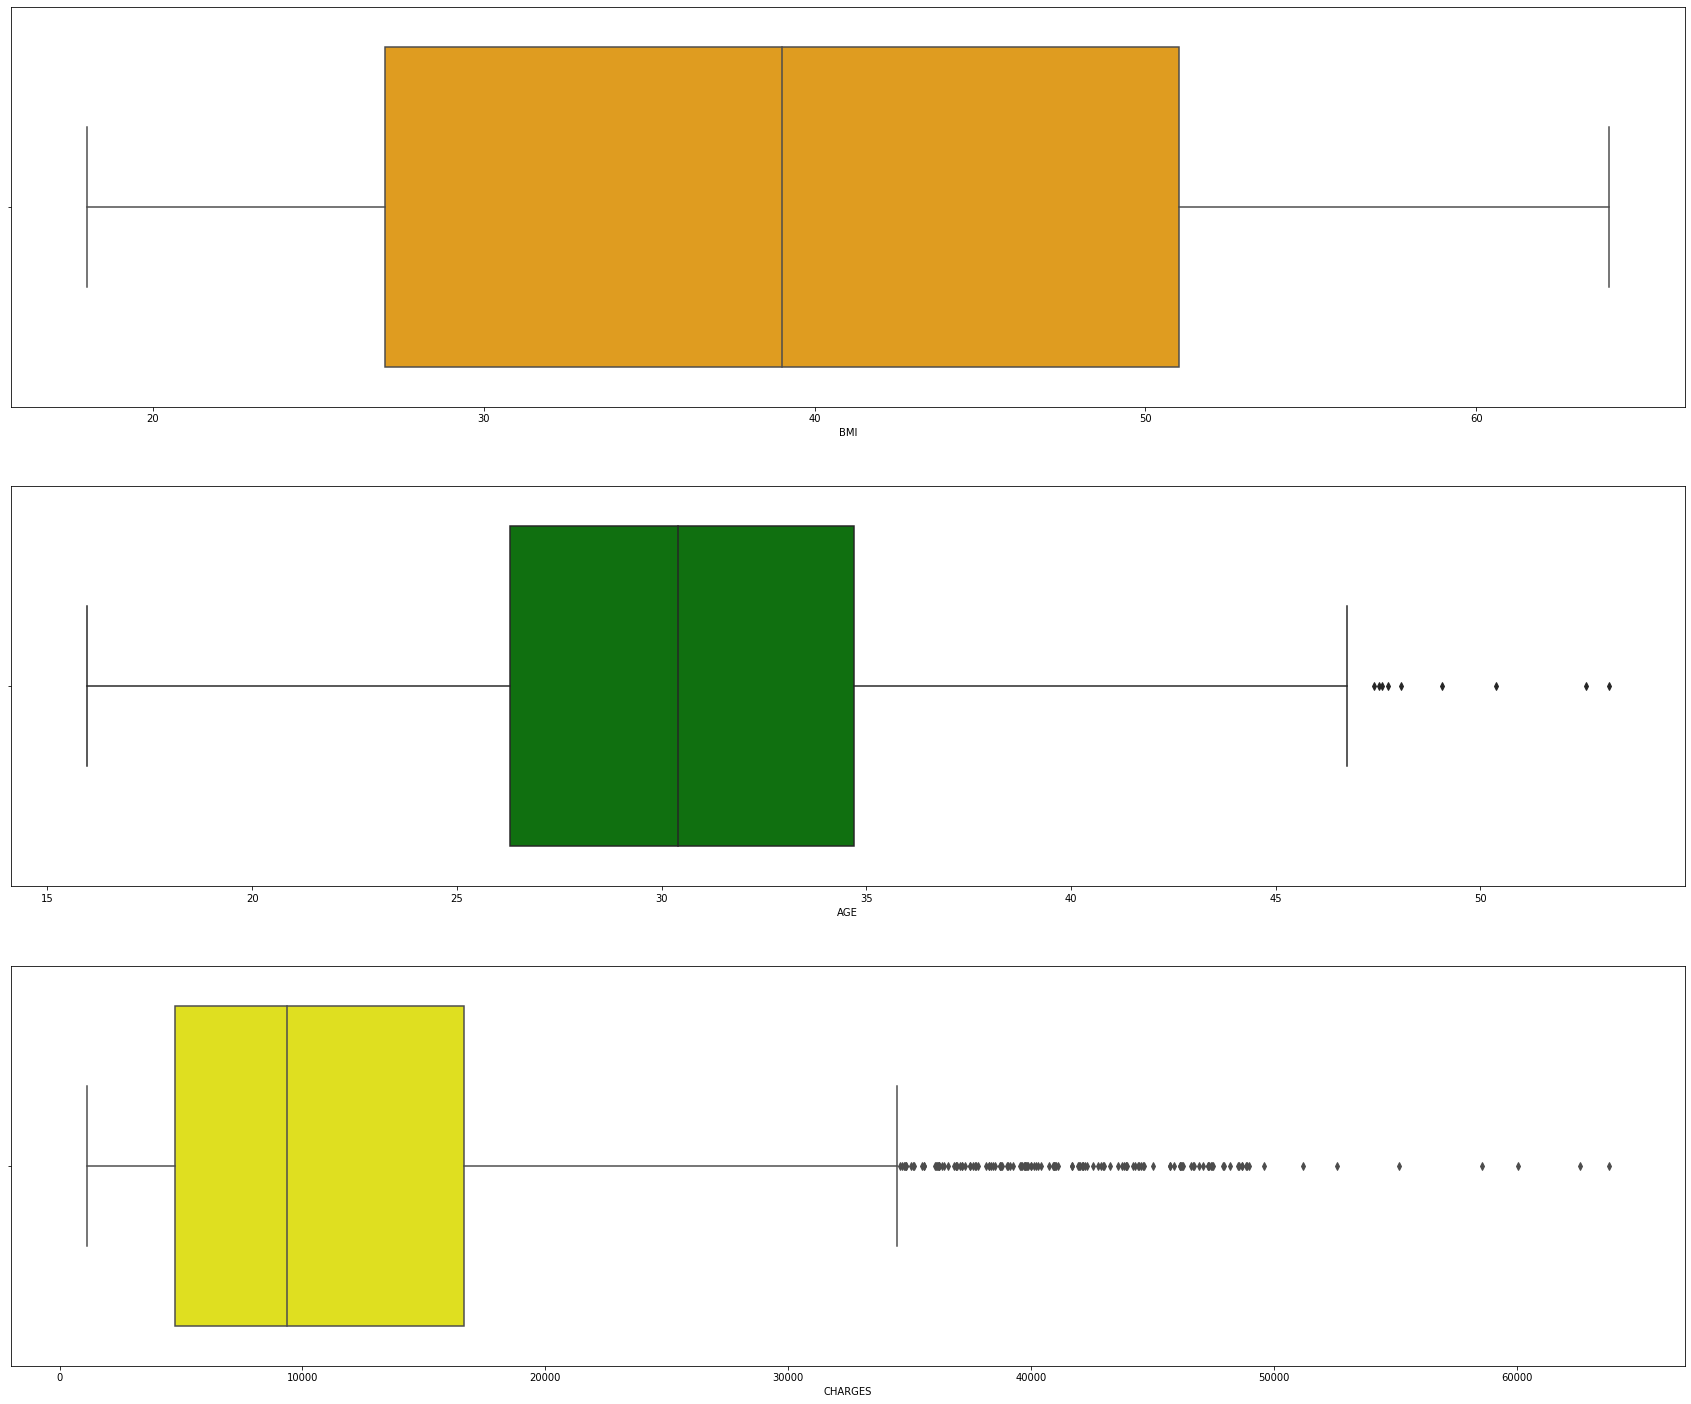

In [155]:
# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

plt.figure(figsize=(30,25))

plt.subplot(3,1,1)
sns.boxplot(x='age',data=data,color='orange')
plt.xlabel('BMI')

plt.subplot(3,1,2)
sns.boxplot(x='bmi',data=data,color='green')
plt.xlabel('AGE')

plt.subplot(3,1,3)
sns.boxplot(x='charges',data=data,color='yellow')
plt.xlabel('CHARGES')

plt.show()

#the box plot of BMI shows no presence of outliers

#In AGE, there are presence of outliers, hence we need to be mindful while analysing the dataset with the age. 
#the outliers are present aorund the age of 45-65

#with the CHARGES box plot produced, it is evident that there are plenty of outliers in the given dataset

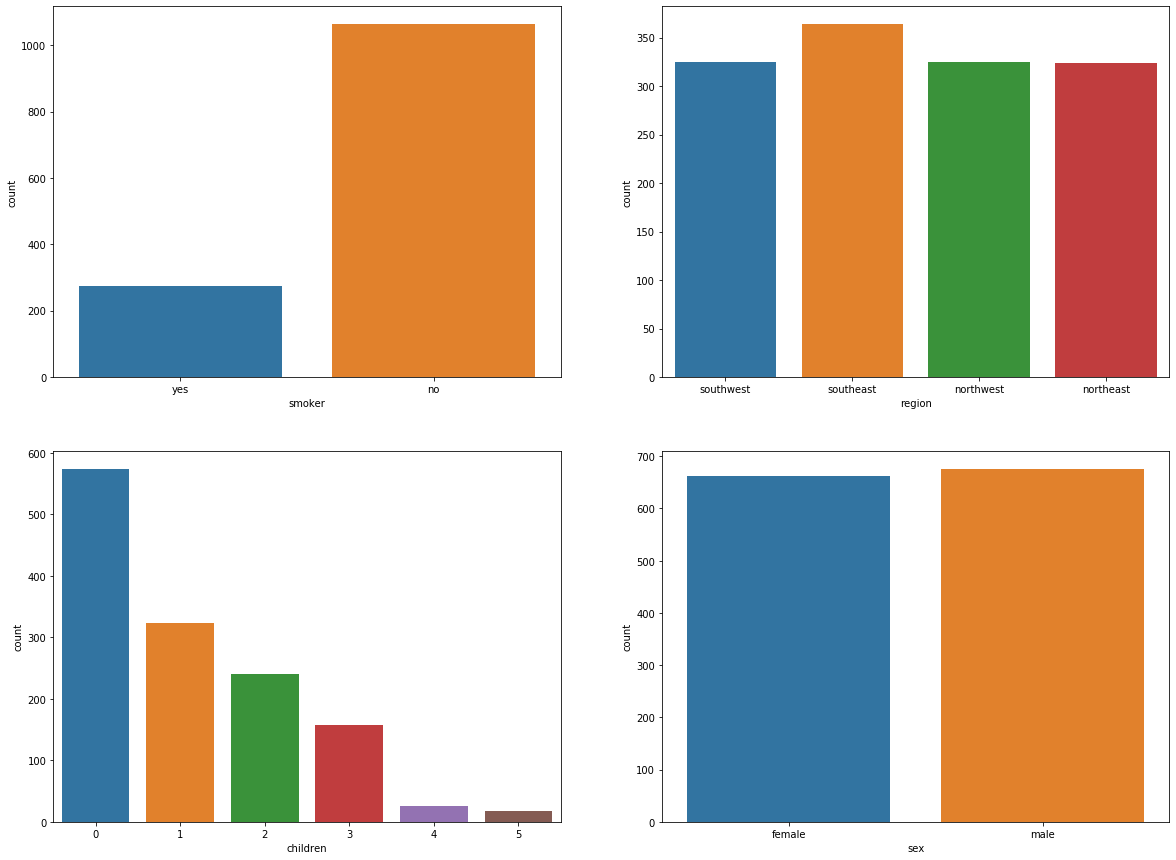

In [146]:
# h. Distribution of categorical columns (include children)

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(data['smoker'])


plt.subplot(2,2,2)
sns.countplot(data['region'])

plt.subplot(2,2,3)
sns.countplot(data['children'])

plt.subplot(2,2,4)
sns.countplot(data['sex'])

plt.show()


#the total no of non-smokers are much higher than smokers

#southeast region has the highest amount of people, whereas the rest of the regions all have almost the same amount of people

#most of the people have two or lesser children, very few have 4-5 children

#the male population is slightly larger than the female population of the given sample

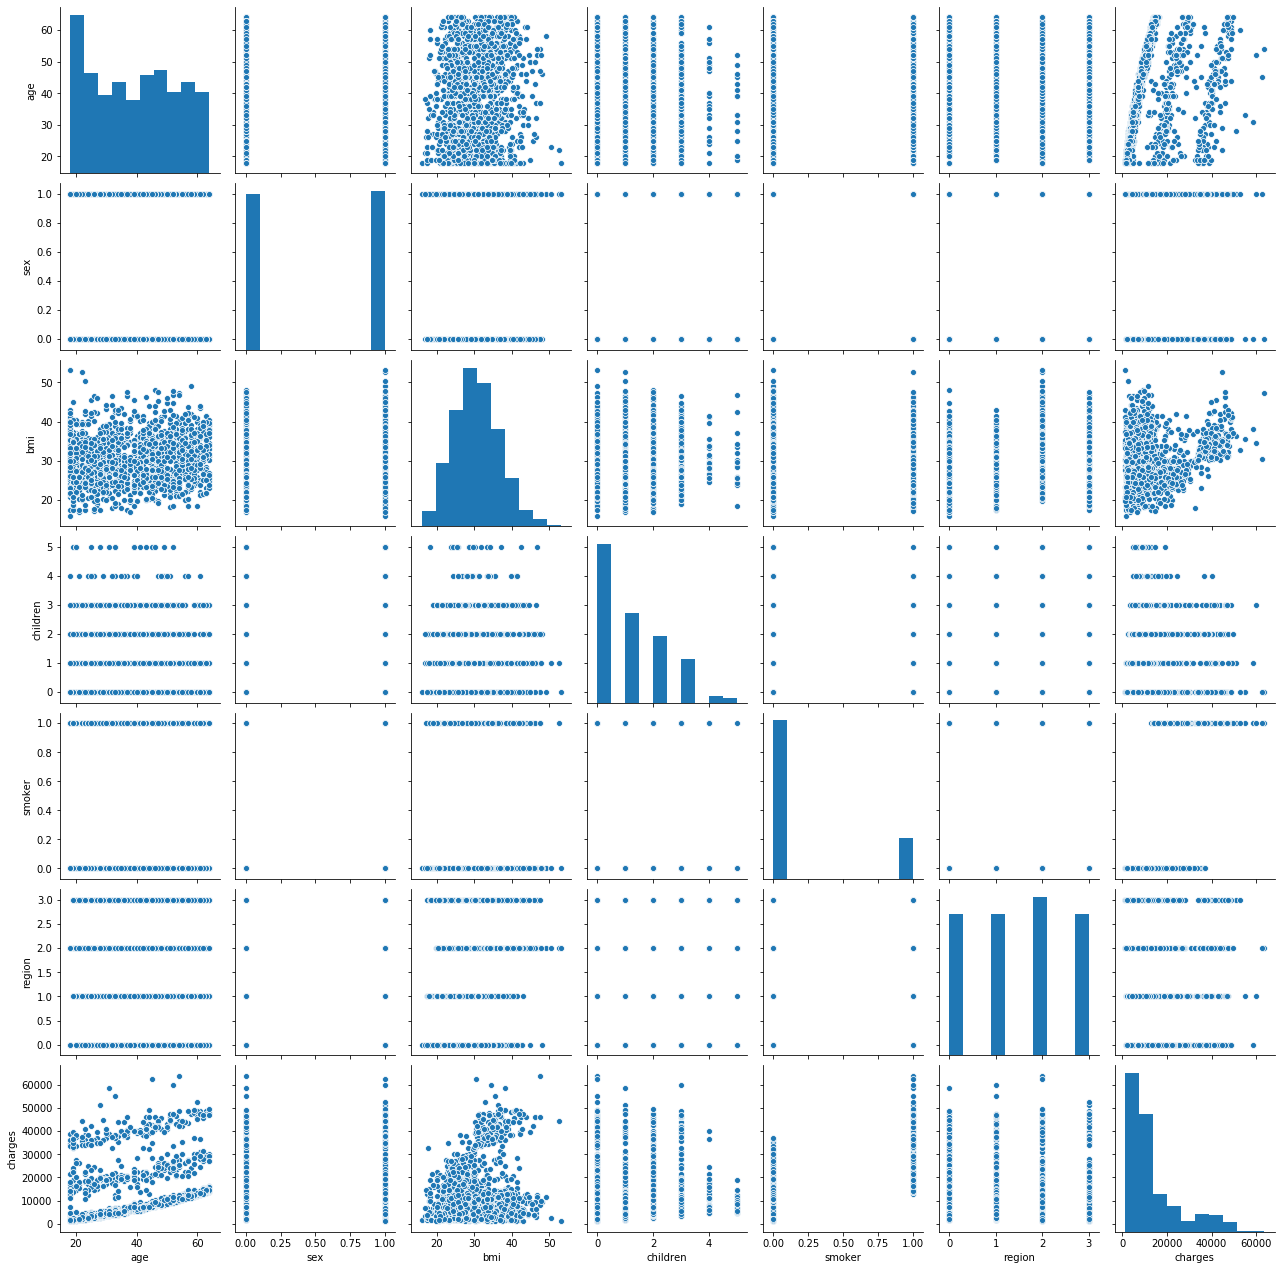

In [147]:
# # i. Pair plot that includes all the columns of the data frame

# #pair plot function automatically ignores the categorical variables and only prints the rest. 
# #hence to avoid that, we encode the categorical variables.

data1=data.copy()
le=LabelEncoder()
data1['region']=le.fit_transform(data1['region'])
data1['smoker']=le.fit_transform(data1['smoker'])
data1['sex']=le.fit_transform(data1['sex'])
sns.pairplot(data1)
plt.show()


# #age and charges show a correlation between them. as age increases, charges also increase
# #smoker and charges show a correlation between them. smoker pays more charges than a non-smoker
# #bmi and charges also have a correlation between them. people with lower bmi, tend to pay lesser

In [156]:
                            # 4. Answer the following questions with statistical evidence

In [149]:
# a. Do charges of people who smoke differ significantly from the people who don't?

yes=data['smoker']=='yes'
yes=data[yes]
smoker_yes=yes['charges']
smoker_yes=smoker_yes.to_numpy()

no=data['smoker']=='no'
no=data[no]
smoker_no=no['charges']
smoker_no=smoker_no.to_numpy()


#we perform t-test
#we set the level of significance to be 5%

#null hypothesis = the charges between the people who smoke and dont smoke is the same i.e. they do not differ
#alternate hypothesis = the charges between the smoker and non-smoker differ

t_statistic, p_value = ttest_ind(smoker_yes, smoker_no)
print('The p_value of the smokers and non-smoker charges is %.3f' %p_value)
print('The p_value is < 0.05 Hence we reject the null hypothesis')


#therefore, the charges of smoker differs significantly from non-smoker

The p_value of the smokers and non-smoker charges is 0.000
The p_value is < 0.05 Hence we reject the null hypothesis


In [150]:
# b. Does bmi of males differ significantly from that of females?

male=data['sex']=='male'
male=data[male]
male=male['bmi']


female=data['sex']=='female'
female=data[female]
female=female['bmi']

#There are two samples and they are independent. Hence we perform t-test

#null hypothesis = bmi of male and female do not differ
#alternate hypothesis = bmi of male and female differ
#we choose a 5% significance level

t_statistic, p_value = ttest_ind(male, female)
print('The p_value of male and female bmi is %.3f' %p_value)
print('Since the p_value is > 0.05, we fail to reject the null hypothesis')

#therefore, the bmi of male and female do not differ

The p_value of male and female bmi is 0.090
Since the p_value is > 0.05, we fail to reject the null hypothesis


In [151]:
# c. Is the proportion of smokers significantly different in different genders?

#we perform chi-squared test, since the column 'smoker' is a categorical variable, we make a crosstab
smokers=pd.crosstab(data['sex'],data['smoker'])


#null hypothesis = The proportion smokers is the same across genders
#alternate hypothesis = The proportion of smokers differ in different genders
#we choose the level of significance to be 5%

chi, p_value, dof, expected =  stats.chi2_contingency(smokers)
print('The chi is %.3f' %chi)
print('The p_value is %.3f' %p_value)
print('The dof is %.3f' %dof)

print('Since the p_value < 0.05, we reject the null hypothesis')

#hence, the proportion of smokers differ significantly different in different genders, in this case male are higher than females

The chi is 7.393
The p_value is 0.007
The dof is 1.000
Since the p_value < 0.05, we reject the null hypothesis


In [152]:
# d. Is the distribution of bmi across women with no children, one child and two children, the same?

female_data=data[data['sex']=='female']
female_0=female_data[female_data['children']==0]
female_1=female_data[female_data['children']==1]
female_2=female_data[female_data['children']==2]

#since this involves more than 2 samples, we use one way anova method

#null-hypothesis = the distribution of bmi across women with no children, one child and two children the same
#alternate-hypothesis = of bmi across women with no children, one child and two children are not the same

stats.f_oneway(female_0['bmi'],female_1['bmi'],female_2['bmi'])



F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

In [153]:
print('Since the p_value is > 0.05, we fail to reject the null hypothesis')

#therefore, the bmi across women with 0,1,2 children is the same

Since the p_value is > 0.05, we fail to reject the null hypothesis
